In [ ]:
!pip install nibabel

In [ ]:
%load_ext autoreload
%autoreload 2
from data import get_dataloader
from args import parse_args

args = parse_args()
train_loader= get_dataloader(args)
print(train_loader)
# 데이터 확인
for fmri, image in train_loader:
    print(f"fMRI shape: {fmri.shape}")
    print(f"Image shape: {image.shape}")
    break

In [ ]:
# 자동 재로드
%load_ext autoreload
%autoreload 2

# 모듈 불러오기
from data import get_dataloader
from args import parse_args
import torch
from itertools import islice

# args 설정 및 dataloader 생성
args = parse_args()
train_loader = get_dataloader(args)

# 마지막 iteration만 가져오기 (shuffle=False 전제)
last_batch = list(islice(train_loader, len(train_loader) - 1, None))[0]
fmri, image = last_batch

# 정보 출력
print(f"✅ Last Batch Loaded")
print(f"fMRI shape: {fmri.shape}")
print(f"Image shape: {image.shape}")
print(f"fMRI NaNs: {torch.isnan(fmri).sum()}, Infs: {(fmri == float('inf')).sum()}")
print(f"fMRI max: {fmri.max()}, min: {fmri.min()}")
print(f"Image NaNs: {torch.isnan(image).sum()}, max: {image.max()}, min: {image.min()}")


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ First fMRI sample loaded
Shape: torch.Size([15724])
NaNs: 0, Infs: 0
Max: 4.931, Min: -4.090, Mean: 0.545


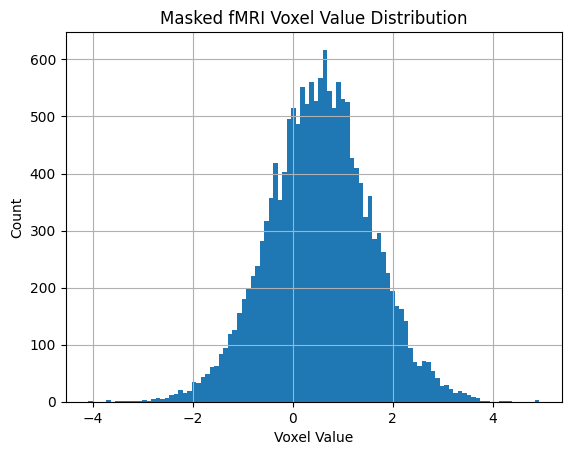

In [1]:
# args 정의
from args import parse_args
from data import get_dataloader

import torch
import matplotlib.pyplot as plt

# args 세팅
args = parse_args()
args.train = 1  # 혹시 train/test 플래그 필요하다면
args.shuffle = False  # 마지막 배치 추출을 위해 필수

# dataloader 불러오기
train_loader = get_dataloader(args)

# 첫 번째 배치 가져오기 (30, N_voxel)
fmri_batch, image_batch = next(iter(train_loader))

# 첫 번째 샘플 선택
fmri_sample = fmri_batch[25]  # shape: (N_voxel,)
image_sample = image_batch[25]  # shape: (3, 425, 425)

# 정보 출력
print(f"✅ First fMRI sample loaded")
print(f"Shape: {fmri_sample.shape}")
print(f"NaNs: {torch.isnan(fmri_sample).sum()}, Infs: {(fmri_sample == float('inf')).sum()}")
print(f"Max: {fmri_sample.max():.3f}, Min: {fmri_sample.min():.3f}, Mean: {fmri_sample.mean():.3f}")

# 히스토그램으로 값 분포 시각화
plt.hist(fmri_sample.cpu().numpy(), bins=100)
plt.title("Masked fMRI Voxel Value Distribution")
plt.xlabel("Voxel Value")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [ ]:
import nibabel as nib
import numpy as np

zscore_path = '/nas/research/03-Neural_decoding/3-bids/derivatives/b4_roi_zscore/sub-01/ses-01/func/sub-01_ses-01_desc-betaroizscore.nii.gz'
z_img = nib.load(zscore_path)
z_data = z_img.get_fdata()

print("Z-score 확인")
print("Mean:", z_data.mean())
print("Std:", z_data.std())
print("Max:", z_data.max())
print("Min:", z_data.min())

In [ ]:
import nibabel as nib
import numpy as np

zscore_path = '/nas/research/03-Neural_decoding/3-bids/derivatives/b4_roi/sub-01/betas_session01.nii.gz'
z_img = nib.load(zscore_path)
z_data = z_img.get_fdata()

print("Z-score 확인")
print("Mean:", z_data.mean())
print("Std:", z_data.std())
print("Max:", z_data.max())
print("Min:", z_data.min())

In [ ]:
from data import get_dataloader, sub1_train_dataset, sub1_test_dataset
from args import parse_args

args = parse_args()

train_dataset = sub1_train_dataset(args)
test_dataset = sub1_test_dataset(args)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")